# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [67]:
athletes = pd.read_csv("athletes.csv")

athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.

get_sample(athletes, 'weight')

2162      80.0
3450      70.0
6886      69.0
3871      66.0
6383      82.0
         ...  
5483      95.0
9943      60.0
347       76.0
2783      89.0
10573    100.0
Name: weight, Length: 100, dtype: float64

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

0.99615 5.681722541339695e-07
count    3000.000000
mean        1.766780
std         0.112402
min         1.330000
25%         1.690000
50%         1.760000
75%         1.840000
max         2.150000
Name: height, dtype: float64
Answer => False


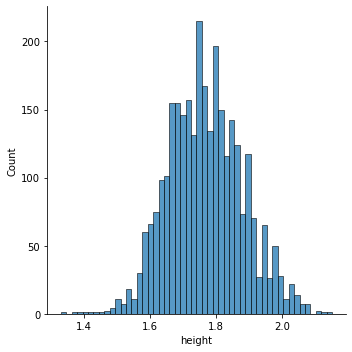

In [50]:
def q1():
    sample = get_sample(athletes, 'height', n=3000)
    sns.displot(sample, bins=50)
    statistic, pvalue = sct.shapiro(sample)
    print(round(statistic, 5), pvalue)
    print(sample.describe())
    return pvalue > 0.05


print('Answer =>', q1())

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

13.03364 0.001478366424594868
count    3000.000000
mean        1.766780
std         0.112402
min         1.330000
25%         1.690000
50%         1.760000
75%         1.840000
max         2.150000
Name: height, dtype: float64
Answer => False


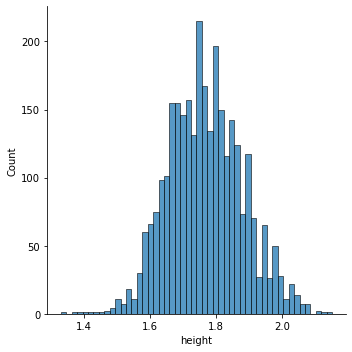

In [51]:
def q2():
    sample = get_sample(athletes, 'height', n=3000)
    sns.displot(sample, bins=50)
    statistic, pvalue = sct.jarque_bera(sample)
    print(round(statistic, 5), pvalue)
    print(sample.describe())
    return pvalue > 0.05

print('Answer =>', q2())

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

510.24655809881176 1.5898922918029537e-111
count    3000.000000
mean       72.122667
std        16.366742
min        37.000000
25%        60.000000
50%        70.000000
75%        81.000000
max       160.000000
Name: weight, dtype: float64
Answer => False


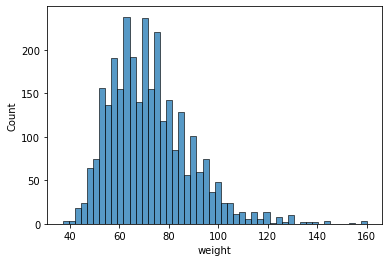

In [66]:
q3_sample = get_sample(athletes, 'weight', n=3000)

def q3():
    sns.histplot(q3_sample, bins=50)
    # sns.boxplot(q3_sample)
    statistic, pvalue = sct.normaltest(q3_sample)
    print(statistic, pvalue)
    print(q3_sample.describe())
    return pvalue > 0.05

print('Answer =>', q3())

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

45.91534331977353 1.0705572101256944e-10
count    3000.000000
mean        4.254357
std         0.216761
min         3.610918
25%         4.094345
50%         4.248495
75%         4.394449
max         5.075174
Name: weight, dtype: float64
Answer => False


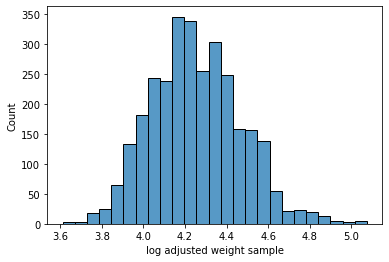

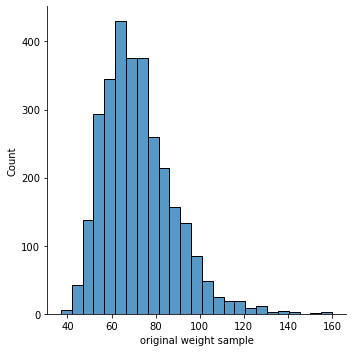

In [53]:
def q4():
    adjust_log_sample = q3_sample.apply(np.log)
    sns.histplot(data=adjust_log_sample, bins=25).set(xlabel='log adjusted weight sample')
    sns.displot(q3_sample, bins=25).set(xlabel='original weight sample')
    statistic, pvalue = sct.normaltest(adjust_log_sample)
    print(statistic, pvalue)
    print(adjust_log_sample.describe())
    return pvalue > 0.05

print('Answer =>', q4())

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [72]:
def q5():
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    bra_avg_height = bra['height'].mean()
    usa_avg_height = usa['height'].mean()
    can_avg_height = can['height'].mean()
    print(bra_avg_height, usa_avg_height, can_avg_height)
    statistic, pvalue = sct.ttest_ind(bra['height'], usa['height'], nan_policy='omit')
    print(statistic, pvalue)
    return pvalue > 0.05

print('Answer =>',q5())

1.764033613445379 1.7877678571428557 1.7585937500000004
-3.2197616412698205 0.0013229277795920673
Answer => False


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [73]:
def q6():
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    bra_avg_height = bra['height'].mean()
    usa_avg_height = usa['height'].mean()
    can_avg_height = can['height'].mean()
    print(bra_avg_height, usa_avg_height, can_avg_height)
    statistic, pvalue = sct.ttest_ind(bra['height'], can['height'], nan_policy='omit')
    print(statistic, pvalue)
    return pvalue > 0.05

print('Answer =>', q6())

1.764033613445379 1.7877678571428557 1.7585937500000004
0.6396212192621117 0.5226033826111448
Answer => True


## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [79]:
def q7():
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    bra_avg_height = bra['height'].mean()
    usa_avg_height = usa['height'].mean()
    can_avg_height = can['height'].mean()
    print(bra_avg_height, usa_avg_height, can_avg_height)
    statistic, pvalue = sct.ttest_ind(usa['height'], can['height'], nan_policy='omit')
    print(statistic, pvalue)
    return round(pvalue, 8)

print('Answer =>', q7())

1.764033613445379 1.7877678571428557 1.7585937500000004
3.5094939427693164 0.0004717857152394269
Answer => 0.00047179


__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?